# Módulo 10 tarefa 2

Considere a mesma base de dados utilizada na tarefa 1 ```previsao_de_renda.csv```.

1) Com o que você viu em aula, faça uma análise das variáveis qualitativas (posse de imóvel e posse de veículo) para verificar se são boas preditoras de *renda*. Alguma delas parece discriminar *renda* de forma estatisticamente significante?

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline

In [3]:
caminho_arquivo = 'C:\\Users\\55119\\OneDrive\\Documentos\\curso EBAC\\Tarefas\\Módulos exercícios\\Ciências de Dados\\previsao_de_renda.csv'

df = pd.read_csv(caminho_arquivo)

df = df.drop(['Unnamed: 0', 'mau'], axis=1)


In [4]:
df

,data_ref,index,sexo,posse_de_veiculo,posse_de_imovel,qtd_filhos,tipo_renda,educacao,estado_civil,tipo_residencia,idade,tempo_emprego,qt_pessoas_residencia,renda
0,2015-01-01,8682,F,False,True,1,Assalariado,Secundário,Casado,Casa,36,3.575342,3.0,3369.24
1,2015-01-01,12830,M,True,True,0,Empresário,Secundário,Casado,Casa,42,0.860274,2.0,6096.14
2,2015-01-01,2885,M,True,True,2,Assalariado,Superior completo,Casado,Casa,31,8.065753,4.0,5658.98
3,2015-01-01,16168,F,True,False,0,Empresário,Secundário,Casado,Casa,50,1.208219,2.0,7246.69
4,2015-01-01,12438,M,False,False,0,Assalariado,Secundário,Casado,Casa,52,13.873973,2.0,4017.37
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14995,2016-03-01,3678,M,True,True,1,Assalariado,Secundário,Casado,Casa,37,2.046575,3.0,1193.29
14996,2016-03-01,3405,M,True,True,1,Servidor público,Superior completo,Casado,Estúdio,30,12.079452,3.0,2519.18
14997,2016-03-01,7944,F,True,True,0,Assalariado,Secundário,Casado,Casa,40,2.161644,2.0,1586.85
14998,2016-03-01,16019,F,False,True,0,Servidor público,Superior completo,Casado,Casa,47,3.295890,2.0,6975.39


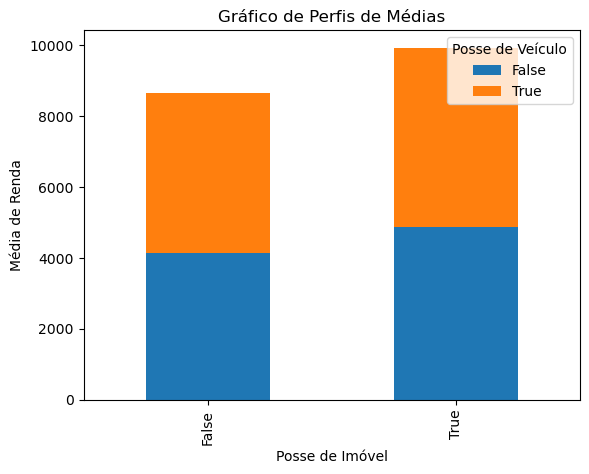

In [18]:
perfil_medias = df.groupby(['posse_de_veiculo', 'posse_de_imovel'])['renda'].mean().reset_index()

perfil_medias_pivot = perfil_medias.pivot(index='posse_de_veiculo', columns='posse_de_imovel', values='renda')
perfil_medias_pivot.plot(kind='bar', stacked=True)

plt.xlabel('Posse de Imóvel')
plt.ylabel('Média de Renda')
plt.title('Gráfico de Perfis de Médias')
plt.legend(title='Posse de Veículo')
plt.show()

Dá para perceber através do gráfico, que há mais valores 'true' entre os perfis de renda mais altos do que os perfis de renda mais baixo.